In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Compute a cost matrix for trajectory sampling

This examples shows how to perform vectorization when computing a cost matrix for multiple trajectories generated for autonomous vehicles.
Given a trajectory $[t_i]_t = [x_i(t),y_i(t),\theta_i(t)], t \in [0,t_f]$ and a target goal at $[x_{goal}, y_{goal}]$ we compute the angle between the last pose of the vehicle and the target as $$ \alpha_i = atan2(Y_i,X_i)$$ with $$X_i = cos(\theta(t_f))\cdot dx_i + sin(\theta(t_f))\cdot dy_i$$ $$Y_i = cos(\theta(t_f))\cdot dy_i - sin(\theta(t_f))\cdot dx_i $$ and $dx_i = x_{goal} - x_i(t_f)$ and $dy_i = y_{goal} - y_i(t_f)$

We need to store all the cost of the trajectories, as we want to normalize costs with respect to the maximum computed cost. Our cost matrix should look like $M = [m_i= \alpha_i / \alpha_{max}]$ with $m_i\in~[0,1]$ 

We managed to store all the last poses of our $n$ trajectories in a matrix of size $(n,3)$ and our goal position in a vector of size $(2,)$


In [68]:
# Pose = np.array([[3,0,0],
#                  [1,0,0],
#                  [2,1,0]])

Pose = np.random.rand(10,3)

goal = np.array([1,0])

### 1. Broadcast goal to get $ [dx_i, dy_i]_i$

In [69]:
P = goal - Pose[:,:2]

### 2. Create the rotations matrix

The goal is to store the rotation matrices associated to the i-th trajectory. We get a matrix of size $(n,2,2)$ : $$R[i] = $$

In [70]:
cos = np.cos(Pose[:,2])
sin = np.sin(Pose[:,2])
R = np.stack([cos,sin,-sin,cos], axis =1).reshape(cos.size,2,2)

### 3. Compute $X_i$ and $Y_i$

Sequential: 

In [55]:
def sequential(P,R):
    d = np.zeros((len(P),2))
    for i in range(P.size[0]):
        temp = R[i] @ P[i].T
        d[i,:] = np.array([temp[0],temp[-1]])
    return d

Vectorized:

In [56]:
def vectorized(P,R):
    return np.einsum('nij,nj->ni', R, P)

### 4. Compute matrix containing $\alpha_{i}$ for $i \in [0,n]$

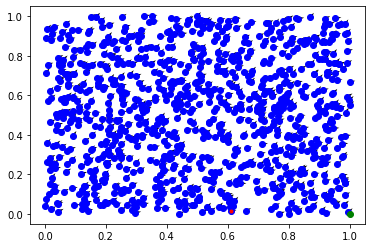

In [71]:
#Sequential
#d = sequential(P,R)

#Vectorized
d = vectorized(P,R)

alpha = np.arctan2(d[:,-1], d[:,0])
cost_M_normalized = np.abs(alpha)/np.max(np.abs(alpha))
best_traj = Pose[np.argmin(cost_M_normalized)]

plt.plot(Pose[:,0],Pose[:,1],'bo')
plt.quiver(Pose[:,0],Pose[:,1],cos,sin  )
plt.plot(goal[0],goal[1], 'go')
plt.plot(best_traj[0],best_traj[1], 'r.')
plt.show()